In [2]:
import pyscf
from pyscf.scf import RHF
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
bf=pyscf.gto.M(atom='B 0 0 0;F 0 0 1.1',basis='sto-3G')

In [4]:
mf=RHF(bf)
mf.kernel()

converged SCF energy = -122.32048686918


-122.32048686918029

In [5]:
S=mf.get_ovlp()
C=mf.mo_coeff
O1=mf.mo_occ
O=np.diag(O1)
P=mf.make_rdm1()

In [6]:
# P = COC+
P==np.dot(C,np.dot(O,C.T))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

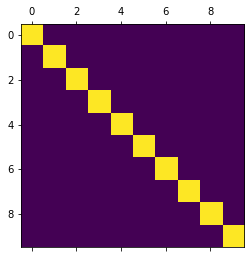

In [7]:
# C+SC= Id.
plt.matshow(np.dot(C.T,np.dot(S,C)))

In [8]:
#PSC=CO
PSC=np.dot(P,np.dot(S,C))
CO=np.dot(C,O)
np.linalg.norm(abs(PSC-CO))

3.852330602011621e-15

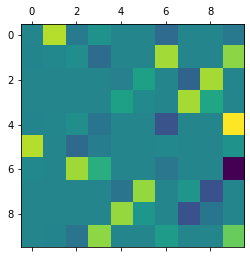

In [9]:
#print(C)
plt.matshow(C)

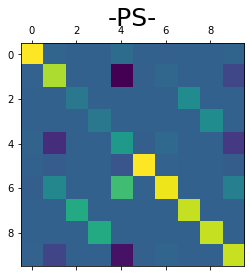

[ 0.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00 -7.47891133e-17  4.28722472e-16  2.00000000e+00
  2.00000000e+00  2.00000000e+00]


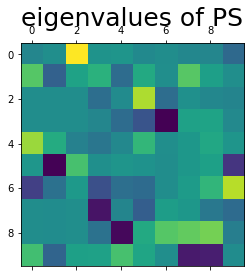

In [14]:
PS=np.dot(P,S)
plt.matshow(PS)
plt.title('-PS-',size=25)
plt.show()
print(np.linalg.eig(PS)[0])
plt.matshow(np.linalg.eig(PS)[1])
plt.title('eigenvalues of PS',size=25)
plt.show()

Unfortunatly the orbitals are random rotated due to the degenercy in orbital occupation, the other possible way to get the Coefficient matrix is to build the Fock matrix from the density matrix and than diagonalize (S-1 F)

In [10]:
print (dir(mf))

['DIIS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chkfile', '_eigh', '_eri', '_finalize', '_is_mem_enough', '_keys', '_t0', '_w0', 'analyze', 'apply', 'as_scanner', 'build', 'callback', 'canonicalize', 'check_convergence', 'check_sanity', 'chkfile', 'conv_check', 'conv_tol', 'conv_tol_grad', 'converged', 'convert_from_', 'damp', 'damp_factor', 'density_fit', 'diis', 'diis_file', 'diis_space', 'diis_space_rollback', 'diis_start_cycle', 'dip_moment', 'direct_scf', 'direct_scf_tol', 'dump_chk', 'dump_flags', 'e_tot', 'eig', 'energy_elec', 'energy_nuc', 'energy_tot', 'from_chk', 'get_fock', 'get_grad', 'get_hcore', 'get_init_guess', 'get_j', 'get_jk', 'get_k', 'get_occ', 'get_ovlp', 'get_ve

In [11]:
help(mf.get_fock)

Help on method get_fock in module pyscf.scf.hf:

get_fock(h1e=None, s1e=None, vhf=None, dm=None, cycle=-1, diis=None, diis_start_cycle=None, level_shift_factor=None, damp_factor=None) method of pyscf.scf.hf.RHF instance
    F = h^{core} + V^{HF}
    
    Special treatment (damping, DIIS, or level shift) will be applied to the
    Fock matrix if diis and cycle is specified (The two parameters are passed
    to get_fock function during the SCF iteration)
    
    Kwargs:
        h1e : 2D ndarray
            Core hamiltonian
        s1e : 2D ndarray
            Overlap matrix, for DIIS
        vhf : 2D ndarray
            HF potential matrix
        dm : 2D ndarray
            Density matrix, for DIIS
        cycle : int
            Then present SCF iteration step, for DIIS
        diis : an object of :attr:`SCF.DIIS` class
            DIIS object to hold intermediate Fock and error vectors
        diis_start_cycle : int
            The step to start DIIS.  Default is 0.
        level_shi

In [12]:
help(mf.get_veff)

Help on method get_veff in module pyscf.scf.hf:

get_veff(mol=None, dm=None, dm_last=0, vhf_last=0, hermi=1) method of pyscf.scf.hf.RHF instance
    Hartree-Fock potential matrix for the given density matrix
    
    Args:
        mol : an instance of :class:`Mole`
    
        dm : ndarray or list of ndarrays
            A density matrix or a list of density matrices
    
    Kwargs:
        dm_last : ndarray or a list of ndarrays or 0
            The density matrix baseline.  If not 0, this function computes the
            increment of HF potential w.r.t. the reference HF potential matrix.
        vhf_last : ndarray or a list of ndarrays or 0
            The reference HF potential matrix.
        hermi : int
            Whether J, K matrix is hermitian
    
            | 0 : no hermitian or symmetric
            | 1 : hermitian
            | 2 : anti-hermitian
    
        vhfopt :
            A class which holds precomputed quantities to optimize the
            computation of J, K

In [50]:
F=mf.get_fock(dm=P,cycle=0)
F1=mf.get_fock()
np.allclose(F1,F)

True

In [86]:
def eig(h, s):
    '''Solver for generalized eigenvalue problem
    .. math:: HC = SCE
    '''
    e, c = scipy.linalg.eigh(h, s)
    idx = np.argmax(abs(c.real), axis=0)
    c[:,c[idx,np.arange(len(e))].real<0] *= -1
    return e, c

[-26.13753306  -7.34319943  -1.69205608  -0.75462838  -0.66617451
  -0.66617451  -0.26963446   0.37829511   0.37829511   0.95979697]
[-26.13753332  -7.34319938  -1.69205618  -0.75462856  -0.66617458
  -0.66617458  -0.26963444   0.37829511   0.37829511   0.95979694]


2.9161056457924097

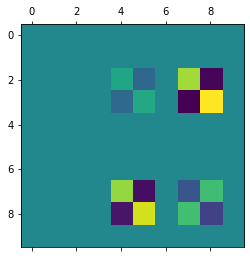

In [110]:
e,C1=eig(F1,S)
C=mf.mo_coeff
print(e)
print(mf.mo_energy)
plt.matshow(C1-C)
np.linalg.norm(C1-C)
#column 4,5 and 7,8 are degenerate, so may be  random rottion of those coefficients

8.812631460377715e-07
[[ 2.99492253e-09 -2.57763706e-08  2.21952232e-16 -2.72149623e-16
  -2.06314313e-09 -1.54992483e-09  1.11161476e-08 -1.24404379e-16
   1.04421326e-16 -3.67013745e-08]
 [-2.57763706e-08  2.17573549e-07 -1.06724207e-15  1.12101851e-15
   5.44708487e-08  1.53496038e-08 -1.15214257e-07  4.03260251e-16
  -4.47159809e-16  2.94356433e-07]
 [ 2.21952232e-16 -1.06724207e-15  5.54906143e-08  5.56846236e-16
   5.68408570e-16  1.03401468e-16  4.99894794e-16  8.01889499e-08
   7.23379689e-16 -5.10861499e-16]
 [-2.72149623e-16  1.12101851e-15  5.56846236e-16  5.54906151e-08
  -3.98633670e-16  6.78855056e-16 -1.29636437e-15  1.13450915e-15
   8.01889509e-08 -2.74744886e-16]
 [-2.06314313e-09  5.44708487e-08  5.68408570e-16 -3.98633670e-16
  -3.13817909e-07 -1.61896905e-08  1.60127620e-07 -2.77054308e-16
   4.00334872e-16  2.10071120e-07]
 [-1.54992483e-09  1.53496038e-08  1.03401468e-16  6.78855056e-16
  -1.61896905e-08 -1.42623247e-10  3.43240547e-09  8.65976315e-17
   3.614555

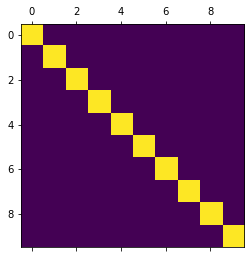

In [120]:
#still C1 leads to ortonormal orbitals and  C1 gives P
print(np.linalg.norm(P-np.dot(C1,np.dot(O,C1.T))))
print(P-np.dot(C1,np.dot(O,C1.T)))
print([np.dot(C1.T,np.dot(S,C1))[i][i] for i in range(10)])
plt.matshow(np.dot(C1.T,np.dot(S,C1)))


0.45264978723340105

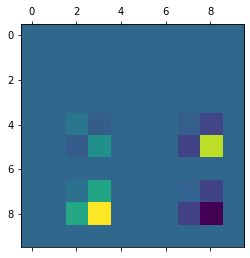

In [109]:
#projection is not suitable
e,C1=eig(F1,S)
C=mf.mo_coeff
C=C.T;C1=C1.T
#for i in range(10):
#    print(i,np.linalg.norm(C[i]-C1[i]))
#print(np.linalg.norm(C[4]),np.linalg.norm(C[5]),np.linalg.norm(C1[4]),np.linalg.norm(C1[5]))
c4=np.linalg.norm(np.dot(C[4],C1[4])/np.linalg.norm(C[4]))*C1[4]+np.linalg.norm(np.dot(C[4],C1[5])/np.linalg.norm(C[4]))*C1[5]
c5=np.linalg.norm(np.dot(C[5],C1[4])/np.linalg.norm(C[5]))*C1[4]+np.linalg.norm(np.dot(C[5],C1[5])/np.linalg.norm(C[5]))*C1[5]
C1[4],C1[5]=c4,c5

c7=np.linalg.norm(np.dot(C[7],C1[7])/np.linalg.norm(C[7]))*C1[7]+np.linalg.norm(np.dot(C[7],C1[8])/np.linalg.norm(C[7]))*C1[8]
c8=np.linalg.norm(np.dot(C[8],C1[7])/np.linalg.norm(C[8]))*C1[7]+np.linalg.norm(np.dot(C[8],C1[8])/np.linalg.norm(C[8]))*C1[8]
C1[7],C1[8]=c7,c8
plt.matshow(C1-C)
np.linalg.norm(C1-C)

In [130]:
#some function
dm=mf.make_rdm1()
h1=mf.get_hcore()
h2=mf.get_veff()
S=mf.get_ovlp()

print ('monoelettronic enegy = ',np.einsum('ij,ji',h1,dm))
print ('Bielettronic enegy = ',np.einsum('ij,ji',h2,dm)/2)
print ('the sum of those two equals = ',mf.energy_elec()[0],mf.energy_tot()-mf.energy_nuc())
print('Total number of electrons= ',np.einsum('ij,ji',S,dm))

monoelettronic enegy =  -212.8418110223995
Bielettronic enegy =  68.87694125335658
the sum of those two equals =  -143.96486976904293 -143.96486976904293
Total number of electrons=  13.995409751535782


In [133]:
#use dm to make prediction 
BF=pyscf.gto.M(atom='B 0 0 0;F 0 0 1.1',basis='def2-TZVP')
bfhf=RHF(BF)
bfhf.kernel()
CO=pyscf.gto.M(atom='C 0 0 0;O 0 0 1.1',basis='def2-TZVP')
cohf=RHF(CO)

converged SCF energy = -124.128936903062


In [134]:
dm=bfhf.make_rdm1()
h1=cohf.get_hcore()
h2=cohf.get_veff(dm=dm)
S=cohf.get_ovlp()

num_e=np.einsum('ij,ji',S,dm)
print ('difference in num_electrons=',num_e)
dm*=14/num_e

mee=np.einsum('ij,ji',h1,dm)
bee=np.einsum('ij,ji',h2,dm)/2
print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)

print('Total energy = ', cohf.kernel(),mee+bee+cohf.energy_nuc())

difference in num_electrons= 14.062779696481613
monoelettronic enegy =  -200.9528035751584
Bielettronic enegy =  65.94689045357934
converged SCF energy = -112.787127600436
Total energy =  -112.78712760043595 -111.91454391779723


In [135]:
#use dm to make prediction 
NN=pyscf.gto.M(atom='N 0 0 0;N 0 0 1.1',basis='def2-TZVP')
nnhf=RHF(NN)

In [136]:
dm=bfhf.make_rdm1()
h1=nnhf.get_hcore()
h2=nnhf.get_veff(dm=dm)
S=nnhf.get_ovlp()

num_e=np.einsum('ij,ji',S,dm)
print ('difference in num_electrons=',num_e)
dm*=14/num_e

mee=np.einsum('ij,ji',h1,dm)
bee=np.einsum('ij,ji',h2,dm)/2
print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)

print('Total energy = ', nnhf.kernel(),mee+bee+nnhf.energy_nuc())

difference in num_electrons= 14.028817180782516
monoelettronic enegy =  -194.245704683455
Bielettronic enegy =  63.23297671826145
converged SCF energy = -108.9876382454
Total energy =  -108.98763824539971 -107.44028856966627
